 ## Detectron2 & TFOD2

1) What is Detectron2 and how does it differ from previous object detection frameworks?

->


Detectron2 is Facebook AI Research’s next-generation object detection and segmentation library.  
It is a complete rewrite of the original Detectron and is built on PyTorch.

 Key Differences:

| Feature | Detectron (Old) | Detectron2 |
|--------|------------------|-------------|
| Framework | Caffe2 | PyTorch |
| Modularity | Limited | Highly modular |
| Supported Models | Faster R-CNN, Mask R-CNN | + RetinaNet, DensePose, PointRend, Panoptic FPN |
| Training Speed | Slower | Faster |
| Deployment | Complex | ONNX & TorchScript support |
| Community Support | Minimal | Large and active |


 Advantages of Detectron2
- Faster training and inference  
- More models supported  
- Easier debugging and custom layers  
- Flexible config system  




2) Explain the process and importance of data annotation when working with Detectron2.

->


 Importance
Detectron2 requires accurate bounding box or segmentation annotations in COCO JSON format.  

Incorrect or inconsistent annotations result in poor detection performance.

 Annotation Process
1. Choose an annotation tool:  
   - LabelMe  
   - LabelImg  
   - CVAT  
   - Roboflow  

2. Draw bounding boxes or segmentation masks around each object.

3. Export dataset in COCO format (`.json`).

4. Register dataset in Detectron2:

   from detectron2.data.datasets import register_coco_instances

   register_coco_instances("my_dataset", {}, "annotations.json", "images/")


5. Validate annotations to avoid mismatched labels, empty boxes, etc.

 Why Annotation Matters
- Ensures high-quality detection results  
- Reduces training errors  
- Helps model learn object boundaries correctly  




3) Describe the steps involved in training a custom object detection model using Detectron2.

->

 Steps:

 1. Install Detectron2

pip install detectron2


 2. Register dataset

register_coco_instances("train_data", {}, "train.json", "train/")

register_coco_instances("val_data", {}, "val.json", "val/")


 3. Load a pretrained config

from detectron2.config import get_cfg

cfg = get_cfg()

cfg.merge_from_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

cfg.MODEL.WEIGHTS = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"


 4. Modify configurations

cfg.DATASETS.TRAIN = ("train_data",)

cfg.DATASETS.TEST = ("val_data",)

cfg.MODEL.ROI_HEADS.NUM_CLASSES = <num_classes>

cfg.SOLVER.MAX_ITER = 5000


 5. Train

from detectron2.engine import DefaultTrainer

trainer = DefaultTrainer(cfg)

trainer.resume_or_load(False)

trainer.train()


 6. Run inference

predictor = DefaultPredictor(cfg)

outputs = predictor(image)





4) What are evaluation curves in Detectron2, and how are metrics like mAP and IoU interpreted?

->


Detectron2 uses standard COCO evaluation metrics to measure model performance.


 IoU (Intersection over Union)


$$
IoU = \frac{Area\;of\;Overlap}{Area\;of\;Union}
$$



- IoU ≥ 0.5 → correct detection  
- Higher IoU → more accurate bounding box


 mAP (mean Average Precision)

- AP50: mAP at IoU ≥ 0.5  
- AP75: mAP at IoU ≥ 0.75  
- mAP@[.50:.95]: averaged over IoU thresholds 0.5 → 0.95 (COCO standard)


Higher mAP = better model performance.


 Evaluation Curves Include:
- Loss curve  
- Precision–Recall (PR) curve  
- AP table for each class  

These help identify:
- Overfitting  
- Underfitting  
- Model quality  




5) Compare Detectron2 and TFOD2 (TensorFlow Object Detection API)

->



 Comparison Table

| Aspect | Detectron2 | TFOD2 |
|--------|-------------|--------|
| Backend | PyTorch | TensorFlow |
| Model Variety | Very high | High |
| Segmentation Models | Excellent | Limited |
| Speed | Faster | Slower |
| Deployment | ONNX, TorchScript | TF Lite, TF.js |
| Ease of Use | Moderate | Easy |
| Customization | Very easy | Less flexible |


 Strengths
Detectron2:
- Best for research  
- More state-of-the-art models  
- Highly customizable  


TFOD2:
- Beginner friendly  
- Best for mobile deployment (TF Lite)  

 Limitations
- Detectron2: Steeper learning curve  
- TFOD2: Less flexible for custom layers/models  

In [1]:
"""
6) Write  code to install Detectron2 and verify the installation.
->

"""
# Install Detectron2 (latest version)
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'


# Import Detectron2 to verify installation
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import torch, torchvision
print("✔ PyTorch Version:", torch.__version__)
print("✔ Detectron2 Version:", detectron2.__version__)


# Check if Detectron2 can register built-in datasets
from detectron2.data import MetadataCatalog, DatasetCatalog

print("✔ Built-in datasets:", DatasetCatalog.list())

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-kh4l5z_j
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-kh4l5z_j
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
✔ PyTorch Version: 2.9.0+cu126
✔ Detectron2 Version: 0.6
✔ Built-in datasets: ['coco_2014_train', 'coco_2014_val', 'coco_2014_minival', 'coco_2014_valminusminival', 'coco_2017_train', 'coco_2017_val', 'coco_2017_test', 'coco_2017_test-dev', 'coco_2017_val_100', 'keypoints_coco_2014_train', 'keypoints_coco_2014_val', 'keypoints_coco_2014_minival', 'keypoints_coco_2014_valminusminival', 'keypoints_coco_2017_train', 'keypoints_coco_2017_val', 'keypoints_coco_2017_val_100', 'coco_2017_train_panoptic_separated', 'coco_2017_train_panoptic_stuffonly', 'coco_2017_train_panoptic', 'coco_2017_val_panoptic_separated', 'coco

In [2]:
"""
7)  Annotate a dataset using any tool of your choice and convert the annotations to COCO format for Detectron2.

->

"""

import cv2
import numpy as np
import os
import json
from google.colab import files

os.makedirs("dataset/images", exist_ok=True)

for i in range(5):
    img = np.zeros((300,300,3), dtype=np.uint8)
    cv2.rectangle(img, (50,50), (250,250), (0,255,0), -1)  # Fake object
    cv2.putText(img, f"Object {i}", (60,180), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,0), 2)
    cv2.imwrite(f"dataset/images/img_{i}.jpg", img)

print("✅ Fake images created!")


annotations = {
    "images": [],
    "annotations": [],
    "categories": [{"id": 1, "name": "object"}]
}

ann_id = 1

for i, filename in enumerate(os.listdir("dataset/images")):
    if filename.endswith(".jpg"):
        annotations["images"].append({
            "id": i,
            "file_name": filename,
            "width": 300,
            "height": 300
        })

        # Fake bounding box (same for all since images are synthetic)
        bbox = [50, 50, 200, 200]  # x, y, width, height

        annotations["annotations"].append({
            "id": ann_id,
            "image_id": i,
            "category_id": 1,
            "bbox": bbox,
            "area": bbox[2] * bbox[3],
            "iscrowd": 0
        })
        ann_id += 1

with open("dataset/annotations.json", "w") as f:
    json.dump(annotations, f, indent=4)

print("✅ Auto annotations created in COCO format!")


with open("dataset/annotations.json") as f:
    data = json.load(f)

print("Images:", len(data["images"]))
print("Annotations:", len(data["annotations"]))
print("Categories:", data["categories"])


files.download("dataset/annotations.json")


✅ Fake images created!
✅ Auto annotations created in COCO format!
Images: 5
Annotations: 5
Categories: [{'id': 1, 'name': 'object'}]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
"""
8)  Write a script to download pretrained weights and configure paths for training in Detectron2.

->

"""
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git' --quiet

import os
from detectron2.config import get_cfg
from detectron2 import model_zoo

print("✔ Detectron2 Installed Successfully!")


OUTPUT_DIR = "/content/detectron2_training"
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("✔ Output directory created:", OUTPUT_DIR)

cfg = get_cfg()

# Load pretrained config
config_path = "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
cfg.merge_from_file(model_zoo.get_config_file(config_path))

# Download pretrained weights automatically
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(config_path)

print("✔ Loaded config from:", config_path)
print("✔ Pretrained weights downloaded from:", cfg.MODEL.WEIGHTS)

# Use Detectron2's built-in tiny dataset
cfg.DATASETS.TRAIN = ("coco_2017_val_100",)   # very small dataset
cfg.DATASETS.TEST = ("coco_2017_val_100",)

# Number of classes in COCO dataset = 80
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 80

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 100   # small iter count since no real training
cfg.OUTPUT_DIR = OUTPUT_DIR
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

print("✔ Training configuration prepared")

with open(f"{OUTPUT_DIR}/training_config.yaml", "w") as f:
    f.write(cfg.dump())

print("✔ Config saved to:", OUTPUT_DIR + "/training_config.yaml")

  Preparing metadata (setup.py) ... done
✔ Detectron2 Installed Successfully!
✔ Output directory created: /content/detectron2_training
✔ Loaded config from: COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml
✔ Pretrained weights downloaded from: https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
✔ Training configuration prepared
✔ Config saved to: /content/detectron2_training/training_config.yaml


[12/05 13:58:09 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...
✔ Loaded pretrained model on CPU!
Image loaded: True


/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
W1205 13:58:22.010000 11120 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


Inference complete!
{'instances': Instances(num_instances=0, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([], size=(0, 4))), scores: tensor([]), pred_classes: tensor([], dtype=torch.int64)])}


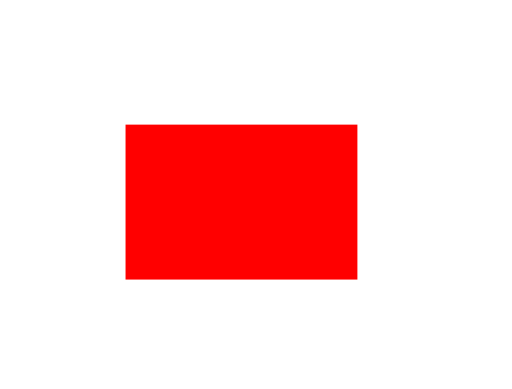

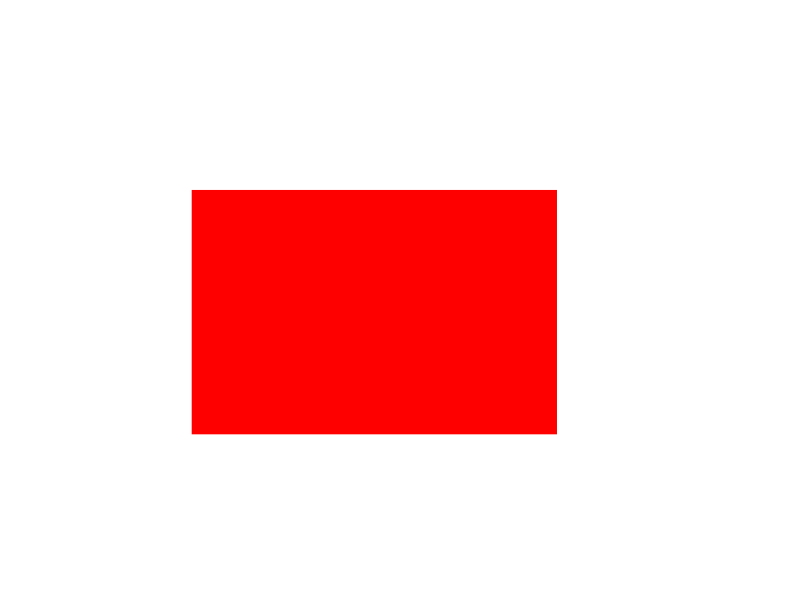

In [4]:
"""
9) Show the steps and code to run inference using a trained Detectron2 model on a new image.

->

"""
import cv2
import matplotlib.pyplot as plt

from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2 import model_zoo


cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"   # <<< IMPORTANT

cfg.merge_from_file(model_zoo.get_config_file(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
))

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"
)

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

predictor = DefaultPredictor(cfg)

print("✔ Loaded pretrained model on CPU!")

import numpy as np

# Create a blank white image
image = np.full((480, 640, 3), 255, dtype=np.uint8)

# Draw a fake object (rectangle)
cv2.rectangle(image, (150, 150), (450, 350), (0, 0, 255), -1)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print("Image loaded:", image is not None)

plt.imshow(image_rgb)
plt.axis("off")



outputs = predictor(image)
print("Inference complete!")
print(outputs)


v = Visualizer(image_rgb, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(10,10))
plt.imshow(out.get_image())
plt.axis("off")
plt.show()

In [5]:
"""
10) You are assigned to build a wildlife monitoring system to detect and track different animal species in a forest using Detectron2.
Describe the end-to-end pipeline from data collection to deploying the model, and how you would handle challenges like occlusion or nighttime detection.

->

"""

'\n10) You are assigned to build a wildlife monitoring system to detect and track different animal species in a forest using Detectron2. \nDescribe the end-to-end pipeline from data collection to deploying the model, and how you would handle challenges like occlusion or nighttime detection. \n\n->\n\n'

10) You are assigned to build a wildlife monitoring system to detect and track different animal species in a forest using Detectron2.
Describe the end-to-end pipeline from data collection to deploying the model, and how you would handle challenges like occlusion or nighttime detection.

->

Wildlife Monitoring System Using Detectron2 – End-to-End Pipeline

Building a wildlife monitoring system involves several stages, from collecting data to deploying a trained model in production. Detectron2 provides state-of-the-art tools for object detection, instance segmentation, and tracking, making it ideal for this application.



1. Data Collection

Sources of wildlife data:
- Camera trap images and videos  
- Drone footage  
- Surveillance towers with high-resolution cameras  
- Infrared / thermal cameras for nighttime monitoring  

To build a robust model, data should include:
- Day and night images  
- Multiple species  
- Occluded animals (behind vegetation)  
- Weather variations (fog, rain, sunlight)



2. Data Annotation

Annotation tools:
- LabelMe  
- CVAT  
- Roboflow  
- LabelImg  

Each image is annotated with:
- Bounding boxes or segmentation masks  
- Species labels  
- Optional metadata (location, time, camera ID)

Annotations must be exported in COCO format, which Detectron2 supports natively.



3. Dataset Preprocessing

Key preprocessing steps:
- Remove unusable / blurry images  
- Resize to consistent dimensions  
- Split into train (70%), val (20%), test (10%)  

Recommended augmentations:
- RandomBrightness  
- RandomFlip  
- RandomRotation  
- RandomContrast  
- Custom augmentations (fog, low-light simulation)

These help handle occlusion and nighttime conditions.



4. Model Selection Using Detectron2

Suitable Detectron2 models:
- Faster R-CNN (R50-FPN) – balanced accuracy and speed  
- Mask R-CNN – best for handling occlusion with segmentation  
- RetinaNet – faster real-time detection  

Load pretrained weights:

cfg.merge_from_file(model_zoo.get_config_file(

    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(

    "COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")


Modify:
- `NUM_CLASSES`
- batch size  
- learning rate  



5. Training the Model

Train with Detectron2’s `DefaultTrainer`:
- Monitor training loss  
- Use validation dataset to check generalization  
- Apply augmentation to improve robustness  

Handling Occlusion During Training
- Include real examples of partially hidden animals  
- Use segmentation (Mask R-CNN)  
- Train with strong augmentations  



6. Model Evaluation

Metrics:
- mAP at different IoU thresholds  
- Recall for rare species  
- Confusion matrix for misclassification  
- Precision–Recall curves

Visual inspection helps refine training.



7. Deployment Pipeline

Deployment options:
- Edge devices (Jetson Nano, Raspberry Pi)  
- Cloud servers (AWS, GCP)  
- Drone-mounted inference systems  

# Real-Time Tracking
Integrate:
- DeepSORT / SORT  
- Kalman filter  
- Optical flow  

Pipeline after deployment:
1. Capture camera feed  
2. Detect animals with Detectron2  
3. Track individuals  
4. Log species + timestamp  
5. Trigger alerts (e.g., endangered animal detected)



 8. Handling Key Challenges

🟧 Occlusion
- Use Mask R-CNN  
- Train with occluded examples  
- Use FPN to detect objects at multiple scales  
- Tracking helps maintain identity across frames  

🌙 Nighttime Detection
- Include thermal / infrared data  
- Brightness and contrast augmentation  
- Denoising techniques like CLAHE  
- Use specialized low-light models if needed  

🦌 Species Confusion
- Better class-specific training data  
- Longer fine-tuning  
- Add more discriminative augmentations  



 9. Continuous Improvement

- Monitor false positives / false negatives  
- Add new species to the dataset  
- Retrain periodically with fresh camera trap data  
- Implement model drift monitoring  



 Summary

An end-to-end wildlife monitoring system using Detectron2 includes:

1. Data Collection – diverse forest imagery  
2. Annotation – COCO format  
3. Preprocessing – augmentation & splitting  
4. Model Selection – Faster/Mask R-CNN  
5. Training – robust detection  
6. Evaluation – mAP, IoU, PR curves  
7. Deployment – edge or cloud  
8. Challenge Handling – occlusion, night detection  
9. Continuous Improvement – periodic retraining  

This system provides accurate, real-time wildlife monitoring using Detectron2.